# Value at Risk (VaR) Analysis for Cryptocurrency Returns

## Introduction

This analysis aims to evaluate the Value at Risk (VaR) for two cryptocurrencies, Ethereum (ETH) and Strike (STRK), using their historical price data. VaR is a statistical measure used to assess the risk of investment portfolios. It estimates the maximum potential loss over a specific time period at a given confidence level. In this analysis, we calculate VaR for both daily and hourly returns of ETH and STRK.

## Data Collection

I used the `yfinance` library to download historical price data for ETH and STRK. The data includes daily and hourly adjusted closing prices for the past year [16-05-2023 to 16-05-2024].

## Methodology

### Step 1: Data Retrieval

I retrieved daily and hourly historical price data for ETH and STRK from 'yfianance'.

### Step 2: Returns Calculation

For each dataset, I calculated the percentage change in the adjusted closing prices to obtain the daily and hourly returns. This was done using the `pct_change()` method, which computes the percentage change between the current and previous values.

### Step 3: Normal Distribution Fitting

I fitted a normal distribution to the calculated returns using the `norm.fit()` function from the `scipy.stats` module. This provided us with the mean (`mu`) and standard deviation (`std`) of the returns.

### Step 4: VaR Calculation

I calculated VaR at different confidence levels (95%, 99%, and 100%) for both the lower and upper tails of the distribution. The VaR values indicate the potential loss (or gain) that would not be exceeded with a specified confidence level.

### Step 5: Visualization

I visualized the distributions of daily and hourly returns using histograms with Kernel Density Estimates (KDE). Vertical lines were added to indicate the VaR at different confidence levels.

## Results

### Ethereum (ETH)

- **Daily Returns Distribution**: The daily returns distribution was fitted with a normal distribution. The VaR at 95%, 99%, and 100% confidence levels was calculated and displayed on the plot.
- **Hourly Returns Distribution**: Similarly, the hourly returns distribution was analyzed, and the corresponding VaR values were calculated and displayed.

### Strike (STRK)

- **Daily Returns Distribution**: The daily returns distribution for STRK was analyzed with the same methodology, and the VaR values were calculated and plotted.
- **Hourly Returns Distribution**: The hourly returns distribution for STRK was also analyzed, and the VaR values were calculated and plotted.

## Conclusion

The VaR analysis provides insights into the potential risk associated with holding ETH and STRK over different time horizons (daily and hourly). By examining the VaR at various confidence levels, investors can better understand the potential losses (or gains) they might incur.

### Important Note

The VaR calculations and normal distribution fittings are based on historical data and assume that future returns will follow a similar distribution. Actual market conditions can vary, and other risk assessment measures should be considered for comprehensive risk management.

## Python Code

Below is the Python code used for the analysis:

In [79]:
import yfinance as yf  # Library for fetching financial data from Yahoo Finance
import numpy as np     # Library for numerical operations
import pandas as pd    # Library for data manipulation and analysis
import seaborn as sns  # Library for data visualization
import matplotlib.pyplot as plt  # Library for plotting graphs
from scipy.stats import norm  # Module for fitting a normal distribution

In [80]:
#To account for both tails of the distribution symmetrically, 
#the confidence levels for the upper and lower percentiles should be centered around the middle. 
#For a 95% confidence interval, you would use the 2.5th percentile for the 
#lower tail and the 97.5th percentile for the upper tail. Similarly, for a 99% confidence interval, 
#you would use the 0.5th percentile for the lower tail and the 99.5th percentile for the upper tail.


# Function to calculate returns for a given data period
def calculate_returns(data, period='1d'):
    """
    Calculate returns for the given data.
    
    Args:
    - data (pd.DataFrame): DataFrame containing price data.
    - period (str): '1d' for daily or '1h' for hourly returns calculation.
    
    Returns:
    - pd.Series: Returns calculated for the specified period.
    """
    # Calculate returns using percent change
    returns = data['Adj Close'].pct_change()

    # Replace infinite values with NaN and drop them
    returns = returns.dropna()
    return returns

In [81]:
# Function to plot VaR for a given ticker symbol
def plot_var(ticker):
    """
    Plot Value at Risk (VaR) for both hourly and daily data.
    
    Args:
    - ticker (str): Ticker symbol of the asset.
    """
    # Retrieve daily historical data for the past year
    daily_data = yf.download(ticker, interval='1d', period='1y')
    # Retrieve hourly historical data for the past year
    hourly_data = yf.download(ticker, interval='1h', period='1y')

    # Calculate daily and hourly returns
    daily_returns = calculate_returns(daily_data, period='1d')
    hourly_returns = calculate_returns(hourly_data, period='1h')

    # Find the number of data points in the returns series
    num_daily_points = len(daily_returns)
    num_hourly_points = len(hourly_returns)
    
    # Fit a normal distribution to the daily and hourly returns
    daily_mu, daily_std = norm.fit(daily_returns)
    hourly_mu, hourly_std = norm.fit(hourly_returns)
    
    # Calculate VaR at different confidence levels for both tails
    daily_var_lower_95 = np.percentile(daily_returns, 2.5)  # 95% confidence level lower VaR (2.5th percentile)
    daily_var_upper_95 = np.percentile(daily_returns, 97.5) # 95% confidence level upper VaR (97.5th percentile)
    daily_var_lower_99 = np.percentile(daily_returns, 0.5)  # 99% confidence level lower VaR (0.5th percentile)
    daily_var_upper_99 = np.percentile(daily_returns, 99.5) # 99% confidence level upper VaR (99.5th percentile)
    daily_var_lower_100 = np.percentile(daily_returns, 0) # 100% confidence level lower VaR (minimum value)
    daily_var_upper_100 = np.percentile(daily_returns, 100) # 100% confidence level upper VaR (maximum value)
    
    hourly_var_lower_95 = np.percentile(hourly_returns, 2.5)  # 95% confidence level lower VaR (2.5th percentile)
    hourly_var_upper_95 = np.percentile(hourly_returns, 97.5) # 95% confidence level upper VaR (97.5th percentile)
    hourly_var_lower_99 = np.percentile(hourly_returns, 0.5)  # 99% confidence level lower VaR (0.5th percentile)
    hourly_var_upper_99 = np.percentile(hourly_returns, 99.5) # 99% confidence level upper VaR (99.5th percentile)
    hourly_var_lower_100 = np.percentile(hourly_returns, 0) # 100% confidence level lower VaR (minimum value)
    hourly_var_upper_100 = np.percentile(hourly_returns, 100) # 100% confidence level upper VaR (maximum value)
    
    # Create subplots for daily and hourly returns distributions
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Plot daily returns distribution with a KDE (Kernel Density Estimate)
    sns.histplot(daily_returns, kde=True, bins=50, stat='density', ax=axes[0])
    xmin, xmax = axes[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, daily_mu, daily_std)
    axes[0].plot(x, p, 'k', linewidth=2, label='Normal distribution fit')
    # Add vertical lines for VaR at 95%, 99%, and 100% confidence levels
    axes[0].axvline(daily_var_lower_95, color='r', linestyle='--', label=f'Lower VaR (95%): {daily_var_lower_95:.2%}')
    axes[0].axvline(daily_var_upper_95, color='r', linestyle='--', label=f'Upper VaR (95%): {daily_var_upper_95:.2%}')
    axes[0].axvline(daily_var_lower_99, color='b', linestyle='--', label=f'Lower VaR (99%): {daily_var_lower_99:.2%}')
    axes[0].axvline(daily_var_upper_99, color='b', linestyle='--', label=f'Upper VaR (99%): {daily_var_upper_99:.2%}')
    axes[0].axvline(daily_var_lower_100, color='g', linestyle='--', label=f'Lower VaR (100%): {daily_var_lower_100:.2%}')
    axes[0].axvline(daily_var_upper_100, color='g', linestyle='--', label=f'Upper VaR (100%): {daily_var_upper_100:.2%}')
    axes[0].set_title(f'{ticker} Daily Returns Distribution with VaR')
    axes[0].set_xlabel('Daily Returns')
    axes[0].set_ylabel('Density')
    axes[0].legend()
    # Add text annotation for the number of data points
    axes[0].text(0.05, 0.95, f'Number of data points: {num_daily_points}', transform=axes[0].transAxes, fontsize=12, verticalalignment='top')
    
    # Plot hourly returns distribution with a KDE (Kernel Density Estimate)
    sns.histplot(hourly_returns, kde=True, bins=50, stat='density', ax=axes[1])
    xmin, xmax = axes[1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, hourly_mu, hourly_std)
    axes[1].plot(x, p, 'k', linewidth=2, label='Normal distribution fit')
    # Add vertical lines for VaR at 95%, 99%, and 100% confidence levels
    axes[1].axvline(hourly_var_lower_95, color='r', linestyle='--', label=f'Lower VaR (95%): {hourly_var_lower_95:.2%}')
    axes[1].axvline(hourly_var_upper_95, color='r', linestyle='--', label=f'Upper VaR (95%): {hourly_var_upper_95:.2%}')
    axes[1].axvline(hourly_var_lower_99, color='b', linestyle='--', label=f'Lower VaR (99%): {hourly_var_lower_99:.2%}')
    axes[1].axvline(hourly_var_upper_99, color='b', linestyle='--', label=f'Upper VaR (99%): {hourly_var_upper_99:.2%}')
    axes[1].axvline(hourly_var_lower_100, color='g', linestyle='--', label=f'Lower VaR (100%): {hourly_var_lower_100:.2%}')
    axes[1].axvline(hourly_var_upper_100, color='g', linestyle='--', label=f'Upper VaR (100%): {hourly_var_upper_100:.2%}')
    axes[1].set_title(f'{ticker} Hourly Returns Distribution with VaR')
    axes[1].set_xlabel('Hourly Returns')
    axes[1].set_ylabel('Density')
    axes[1].legend()
    # Add text annotation for the number of data points
    axes[1].text(0.05, 0.95, f'Number of data points: {num_hourly_points}', transform=axes[1].transAxes, fontsize=12, verticalalignment='top')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


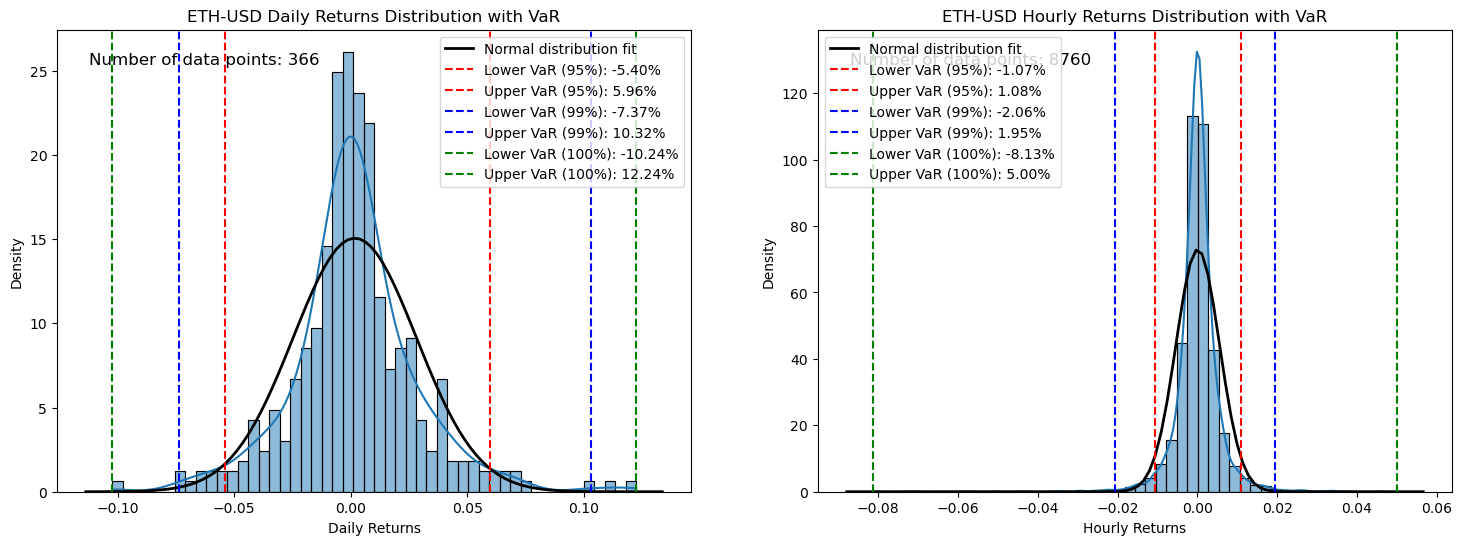

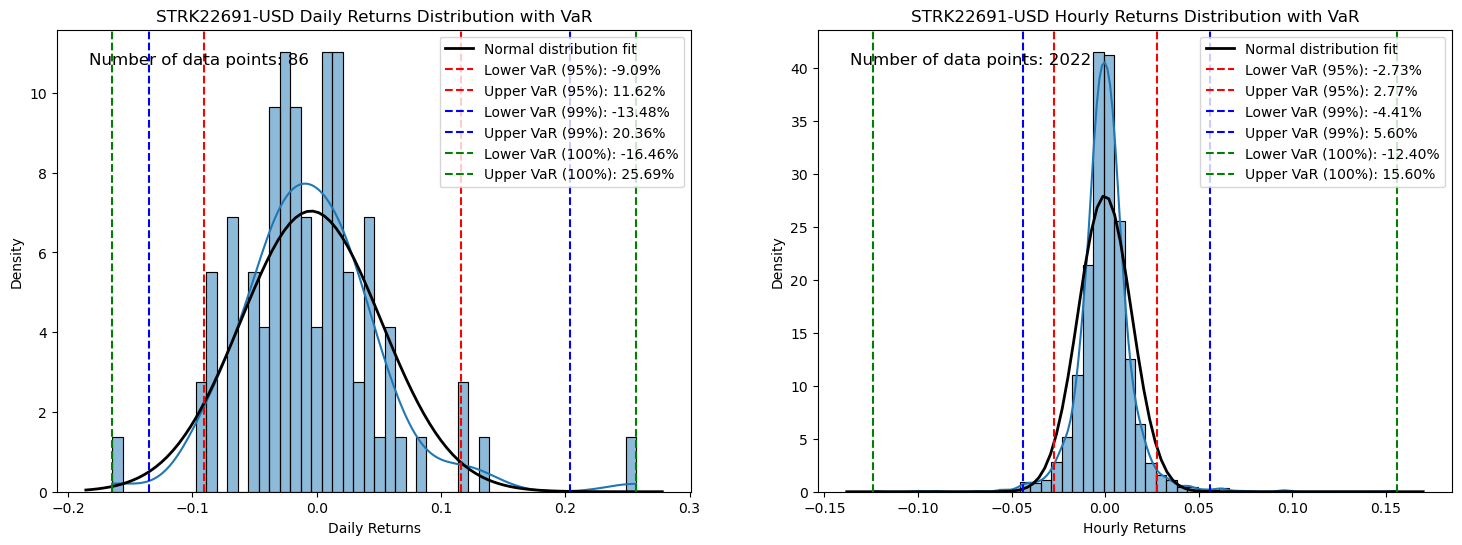

In [82]:
# Plot VaR for ETH
plot_var('ETH-USD')

# Plot VaR for STRK
plot_var('STRK22691-USD')